## Clustering the spotify dataframe

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

#### Loading the dataset

In [2]:
spotify_maris_df = pd.read_csv('spotify_df.csv')

In [3]:
spotify_maris_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0,0.522,0.817,0,-6.170,1,0.0512,0.3290,0.000002,0.0807,...,151.106,audio_features,5SfM1f729pv1DdiEcyDiex,spotify:track:5SfM1f729pv1DdiEcyDiex,https://api.spotify.com/v1/tracks/5SfM1f729pv1...,https://api.spotify.com/v1/audio-analysis/5SfM...,204693,4,Yola,Diamond Studded Shoes
1,1,0.533,0.776,8,-7.092,1,0.0847,0.1510,0.000087,0.1300,...,90.061,audio_features,7gyDV6Y7GmHqQS4KnzI5Zk,spotify:track:7gyDV6Y7GmHqQS4KnzI5Zk,https://api.spotify.com/v1/tracks/7gyDV6Y7GmHq...,https://api.spotify.com/v1/audio-analysis/7gyD...,214187,4,The War and Treaty,Are You Ready to Love Me?
2,2,0.692,0.651,9,-8.267,1,0.0324,0.2920,0.002410,0.1050,...,97.923,audio_features,0bRXwKfigvpKZUurwqAlEh,spotify:track:0bRXwKfigvpKZUurwqAlEh,https://api.spotify.com/v1/tracks/0bRXwKfigvpK...,https://api.spotify.com/v1/audio-analysis/0bRX...,254560,4,Bill Withers,Lovely Day
3,3,0.873,0.651,1,-4.179,1,0.0374,0.0251,0.000107,0.2130,...,115.002,audio_features,2JHHXGSC6Ra3IJOBNLbhS6,spotify:track:2JHHXGSC6Ra3IJOBNLbhS6,https://api.spotify.com/v1/tracks/2JHHXGSC6Ra3...,https://api.spotify.com/v1/audio-analysis/2JHH...,178290,4,Jon Batiste,FREEDOM
4,4,0.682,0.605,8,-10.771,1,0.0403,0.1850,0.003260,0.0469,...,125.960,audio_features,241RmK77gecJ1y7jOoQ5lu,spotify:track:241RmK77gecJ1y7jOoQ5lu,https://api.spotify.com/v1/tracks/241RmK77gecJ...,https://api.spotify.com/v1/audio-analysis/241R...,171360,4,Natalie Cole,This Will Be (An Everlasting Love) - 2003 Rema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,170,0.651,0.801,0,-7.340,1,0.0514,0.1230,0.000000,0.0825,...,133.769,audio_features,5jzma6gCzYtKB1DbEwFZKH,spotify:track:5jzma6gCzYtKB1DbEwFZKH,https://api.spotify.com/v1/tracks/5jzma6gCzYtK...,https://api.spotify.com/v1/audio-analysis/5jzm...,200480,4,The Clash,London Calling - Remastered
3311,171,0.543,0.529,7,-9.717,1,0.0301,0.3260,0.002690,0.7090,...,85.126,audio_features,3KPwt1LBpt1jVSHz8GXERo,spotify:track:3KPwt1LBpt1jVSHz8GXERo,https://api.spotify.com/v1/tracks/3KPwt1LBpt1j...,https://api.spotify.com/v1/audio-analysis/3KPw...,313840,4,Bad Company,Feel like Makin' Love - 2015 Remaster
3312,172,0.468,0.607,9,-11.367,1,0.0336,0.0720,0.000852,0.2250,...,98.429,audio_features,3MODES4TNtygekLl146Dxd,spotify:track:3MODES4TNtygekLl146Dxd,https://api.spotify.com/v1/tracks/3MODES4TNtyg...,https://api.spotify.com/v1/audio-analysis/3MOD...,263333,4,Led Zeppelin,Ramble On - 1990 Remaster
3313,173,0.299,0.787,0,-7.930,0,0.0690,0.1400,0.000000,0.2920,...,94.798,audio_features,45s88Xopo6KvHc0PQ05aGg,spotify:track:45s88Xopo6KvHc0PQ05aGg,https://api.spotify.com/v1/tracks/45s88Xopo6Kv...,https://api.spotify.com/v1/audio-analysis/45s8...,198867,4,The Who,My Generation - Mono Version


In [4]:
spotify_cristina_df = pd.read_csv('spotify1__df.csv')

In [5]:
spotify_cristina_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0,0.918,0.609,10,-5.640,0,0.0791,0.09280,0.000000,0.1390,...,128.008,audio_features,0CAfXk7DXMnon4gLudAp7J,spotify:track:0CAfXk7DXMnon4gLudAp7J,https://api.spotify.com/v1/tracks/0CAfXk7DXMno...,https://api.spotify.com/v1/audio-analysis/0CAf...,231400,4,Flo Rida,Low (feat. T-Pain)
1,1,0.899,0.713,6,-2.752,0,0.3660,0.25500,0.000000,0.0708,...,90.051,audio_features,7iL6o9tox1zgHpKUfh9vuC,spotify:track:7iL6o9tox1zgHpKUfh9vuC,https://api.spotify.com/v1/tracks/7iL6o9tox1zg...,https://api.spotify.com/v1/audio-analysis/7iL6...,193467,4,50 Cent,In Da Club
2,2,0.957,0.737,2,-4.880,1,0.1150,0.21000,0.000000,0.0616,...,107.088,audio_features,5FLctoy4mpCxLJ1QPneTOV,spotify:track:5FLctoy4mpCxLJ1QPneTOV,https://api.spotify.com/v1/tracks/5FLctoy4mpCx...,https://api.spotify.com/v1/audio-analysis/5FLc...,228240,4,Nelly,Hot In Herre
3,3,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,...,99.259,audio_features,0TwBtDAWpkpM3srywFVOV5,spotify:track:0TwBtDAWpkpM3srywFVOV5,https://api.spotify.com/v1/tracks/0TwBtDAWpkpM...,https://api.spotify.com/v1/audio-analysis/0TwB...,235933,4,Beyoncé,Crazy In Love (feat. Jay-Z)
4,4,0.768,0.864,11,-6.145,1,0.0324,0.10100,0.000000,0.1620,...,110.008,audio_features,1Je1IMUlBXcx1Fz0WE7oPT,spotify:track:1Je1IMUlBXcx1Fz0WE7oPT,https://api.spotify.com/v1/tracks/1Je1IMUlBXcx...,https://api.spotify.com/v1/audio-analysis/1Je1...,173027,4,Spice Girls,Wannabe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,135,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,...,122.019,audio_features,0BbYTaDH81up32xTKIGjbS,spotify:track:0BbYTaDH81up32xTKIGjbS,https://api.spotify.com/v1/tracks/0BbYTaDH81up...,https://api.spotify.com/v1/audio-analysis/0BbY...,175164,4,Katja Krasavice,Onlyfans
1769,136,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,...,120.966,audio_features,3uUuGVFu1V7jTQL60S1r8z,spotify:track:3uUuGVFu1V7jTQL60S1r8z,https://api.spotify.com/v1/tracks/3uUuGVFu1V7j...,https://api.spotify.com/v1/audio-analysis/3uUu...,148197,4,Lost Frequencies,Where Are You Now
1770,137,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,...,139.317,audio_features,35VFenXHO0oWYugtj94zgi,spotify:track:35VFenXHO0oWYugtj94zgi,https://api.spotify.com/v1/tracks/35VFenXHO0oW...,https://api.spotify.com/v1/audio-analysis/35VF...,242320,5,Pitbull,Oye
1771,138,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,...,134.834,audio_features,1HIpZLA28pXpKvuFTvlZHH,spotify:track:1HIpZLA28pXpKvuFTvlZHH,https://api.spotify.com/v1/tracks/1HIpZLA28pXp...,https://api.spotify.com/v1/audio-analysis/1HIp...,267400,4,Ultravox,Hymn


In [8]:
spotify_final_df = pd.concat([spotify_maris_df,spotify_cristina_df], axis = 0).reset_index()

In [11]:
spotify_final_df.drop(columns = ["index", "Unnamed: 0"], inplace = True)

In [12]:
spotify_final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,song_title
0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,0.0807,0.562,151.106,audio_features,5SfM1f729pv1DdiEcyDiex,spotify:track:5SfM1f729pv1DdiEcyDiex,https://api.spotify.com/v1/tracks/5SfM1f729pv1...,https://api.spotify.com/v1/audio-analysis/5SfM...,204693,4,Yola,Diamond Studded Shoes
1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,0.1300,0.697,90.061,audio_features,7gyDV6Y7GmHqQS4KnzI5Zk,spotify:track:7gyDV6Y7GmHqQS4KnzI5Zk,https://api.spotify.com/v1/tracks/7gyDV6Y7GmHq...,https://api.spotify.com/v1/audio-analysis/7gyD...,214187,4,The War and Treaty,Are You Ready to Love Me?
2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,0.1050,0.706,97.923,audio_features,0bRXwKfigvpKZUurwqAlEh,spotify:track:0bRXwKfigvpKZUurwqAlEh,https://api.spotify.com/v1/tracks/0bRXwKfigvpK...,https://api.spotify.com/v1/audio-analysis/0bRX...,254560,4,Bill Withers,Lovely Day
3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,0.2130,0.828,115.002,audio_features,2JHHXGSC6Ra3IJOBNLbhS6,spotify:track:2JHHXGSC6Ra3IJOBNLbhS6,https://api.spotify.com/v1/tracks/2JHHXGSC6Ra3...,https://api.spotify.com/v1/audio-analysis/2JHH...,178290,4,Jon Batiste,FREEDOM
4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,0.0469,0.914,125.960,audio_features,241RmK77gecJ1y7jOoQ5lu,spotify:track:241RmK77gecJ1y7jOoQ5lu,https://api.spotify.com/v1/tracks/241RmK77gecJ...,https://api.spotify.com/v1/audio-analysis/241R...,171360,4,Natalie Cole,This Will Be (An Everlasting Love) - 2003 Rema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,0.771,122.019,audio_features,0BbYTaDH81up32xTKIGjbS,spotify:track:0BbYTaDH81up32xTKIGjbS,https://api.spotify.com/v1/tracks/0BbYTaDH81up...,https://api.spotify.com/v1/audio-analysis/0BbY...,175164,4,Katja Krasavice,Onlyfans
5084,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,audio_features,3uUuGVFu1V7jTQL60S1r8z,spotify:track:3uUuGVFu1V7jTQL60S1r8z,https://api.spotify.com/v1/tracks/3uUuGVFu1V7j...,https://api.spotify.com/v1/audio-analysis/3uUu...,148197,4,Lost Frequencies,Where Are You Now
5085,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,0.515,139.317,audio_features,35VFenXHO0oWYugtj94zgi,spotify:track:35VFenXHO0oWYugtj94zgi,https://api.spotify.com/v1/tracks/35VFenXHO0oW...,https://api.spotify.com/v1/audio-analysis/35VF...,242320,5,Pitbull,Oye
5086,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,0.627,134.834,audio_features,1HIpZLA28pXpKvuFTvlZHH,spotify:track:1HIpZLA28pXpKvuFTvlZHH,https://api.spotify.com/v1/tracks/1HIpZLA28pXp...,https://api.spotify.com/v1/audio-analysis/1HIp...,267400,4,Ultravox,Hymn


In [14]:
spotify_final_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5.088000e+03,5088.000000
mean,0.646714,0.544249,5.065252,-9.383852,0.624214,0.098396,0.349456,0.153644,0.166712,0.509171,119.594594,2.088021e+05,3.922956
std,0.159297,0.228688,3.608966,5.771601,0.484373,0.101368,0.320912,0.311862,0.132211,0.233582,28.793099,8.278333e+04,0.360688
min,0.000000,0.002120,0.000000,-43.738000,0.000000,0.000000,0.000018,0.000000,0.005350,0.000000,0.000000,5.061300e+04,0.000000
25%,0.556000,0.387000,1.000000,-11.164750,0.000000,0.038200,0.060800,0.000000,0.094775,0.331000,97.508500,1.624042e+05,4.000000
50%,0.664000,0.572000,5.000000,-7.410500,1.000000,0.053150,0.240000,0.000011,0.117000,0.510000,119.602500,1.967880e+05,4.000000
75%,0.758000,0.718000,8.000000,-5.507000,1.000000,0.109000,0.634000,0.022625,0.184250,0.695000,139.958250,2.344132e+05,4.000000
max,0.980000,1.000000,11.000000,0.175000,1.000000,0.916000,0.996000,0.976000,0.986000,0.979000,216.587000,1.252322e+06,5.000000


 #### Using StandardScaler to standardize the dataframe.

In [16]:
# I will get only numerical columns for that.

spotify_final_df_num = spotify_final_df._get_numeric_data()
spotify_final_df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693,4
1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187,4
2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560,4
3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290,4
4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164,4
5084,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197,4
5085,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320,5
5086,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400,4


In [19]:
scaler = StandardScaler()
scaler.fit(spotify_final_df_num)
spotify_final_df_num_scaled = scaler.transform(spotify_final_df_num)
spotify_final_df_num_scaled_df = pd.DataFrame(spotify_final_df_num_scaled, columns = spotify_final_df_num.columns)

display(spotify_final_df_num_scaled_df)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.782979,1.192791,-1.403657,0.556894,0.775896,-0.465635,-0.063750,-0.492709,-0.650630,0.226191,1.094516,-0.049642,0.213624
1,-0.713919,1.013490,0.813262,0.397130,0.775896,-0.135124,-0.618475,-0.492437,-0.277705,0.804202,-1.025819,0.065054,0.213624
2,0.284311,0.466841,1.090377,0.193527,0.775896,-0.651116,-0.179058,-0.484986,-0.466815,0.842736,-0.752740,0.552797,0.213624
3,1.420662,0.466841,-1.126542,0.901893,0.775896,-0.601786,-1.010833,-0.492371,0.350142,1.365088,-0.159519,-0.368614,0.213624
4,0.221530,0.265674,0.813262,-0.240364,0.775896,-0.573175,-0.512516,-0.482260,-0.906307,1.733302,0.221096,-0.452335,0.213624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,1.991976,-0.018583,-0.018082,0.159738,-1.288832,-0.217999,-0.927313,-0.492715,-0.497073,1.121038,0.084209,-0.406379,0.213624
5084,0.152470,0.401243,0.259033,0.219519,-1.288832,0.045423,0.515906,-0.491397,0.040001,-1.058279,0.047634,-0.732165,0.213624
5085,-0.462792,1.363346,1.090377,0.793073,0.775896,2.689511,-1.025480,-0.492556,0.092952,0.024957,0.685037,0.404927,2.986373
5086,-0.833205,0.510573,-1.403657,-0.357501,0.775896,-0.561336,-1.075312,-0.489123,-0.383606,0.504493,0.529325,0.707916,0.213624


#### Clustering

In [34]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(spotify_final_df_num_scaled_df)

KMeans(random_state=1234)

In [35]:
kmeans.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int32)

In [36]:
clusters = kmeans.predict(spotify_final_df_num_scaled_df)

pd.Series(clusters).value_counts().sort_index()

0    1433
1     614
2     667
3     186
4     535
5     220
6    1150
7     283
dtype: int64

In [37]:
spotify_final_df_num["cluster"] = clusters
spotify_final_df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.522,0.817,0,-6.170,1,0.0512,0.32900,0.000002,0.0807,0.562,151.106,204693,4,0
1,0.533,0.776,8,-7.092,1,0.0847,0.15100,0.000087,0.1300,0.697,90.061,214187,4,0
2,0.692,0.651,9,-8.267,1,0.0324,0.29200,0.002410,0.1050,0.706,97.923,254560,4,0
3,0.873,0.651,1,-4.179,1,0.0374,0.02510,0.000107,0.2130,0.828,115.002,178290,4,0
4,0.682,0.605,8,-10.771,1,0.0403,0.18500,0.003260,0.0469,0.914,125.960,171360,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.964,0.540,5,-8.462,0,0.0763,0.05190,0.000000,0.1010,0.771,122.019,175164,4,6
5084,0.671,0.636,6,-8.117,0,0.1030,0.51500,0.000411,0.1720,0.262,120.966,148197,4,6
5085,0.573,0.856,9,-4.807,1,0.3710,0.02040,0.000049,0.1790,0.515,139.317,242320,5,4
5086,0.514,0.661,0,-11.447,1,0.0415,0.00441,0.001120,0.1160,0.627,134.834,267400,4,0


In [38]:
kmeans.inertia_

35584.93293918493

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

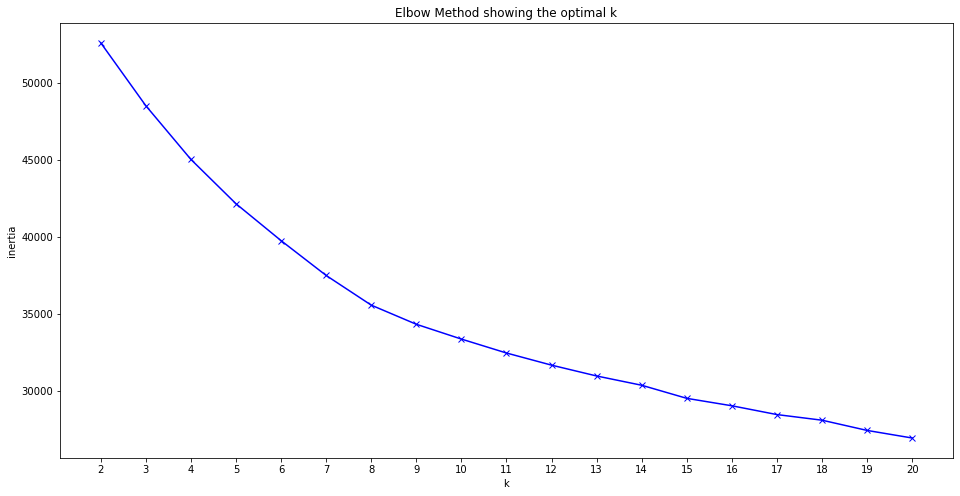

In [39]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(spotify_final_df_num_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

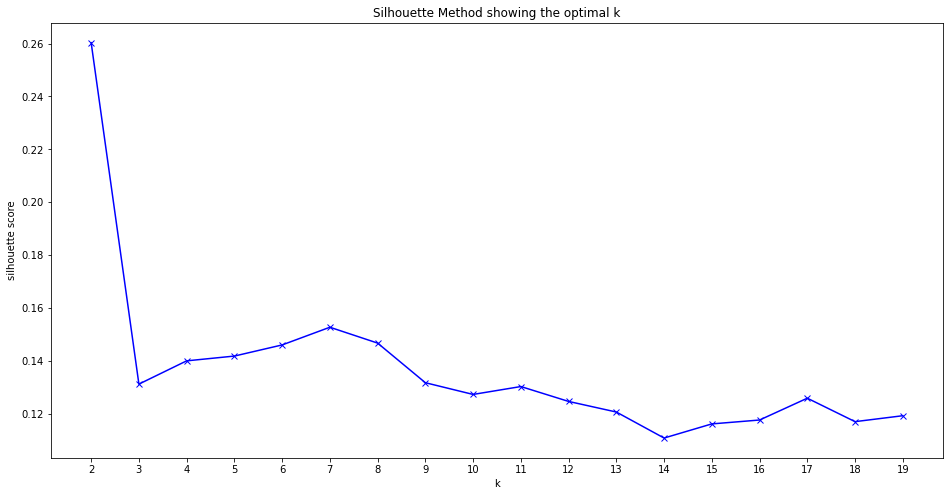

In [28]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(spotify_final_df_num_scaled_df)
    
    
    silhouette.append(silhouette_score(spotify_final_df_num_scaled_df, kmeans.predict(spotify_final_df_num_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')